In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [338]:
df=pd.read_csv('AUD_JPY.csv',usecols=["Date","DF Avg Rank"])

In [339]:
df.columns

Index(['Date', 'DF Avg Rank'], dtype='object')

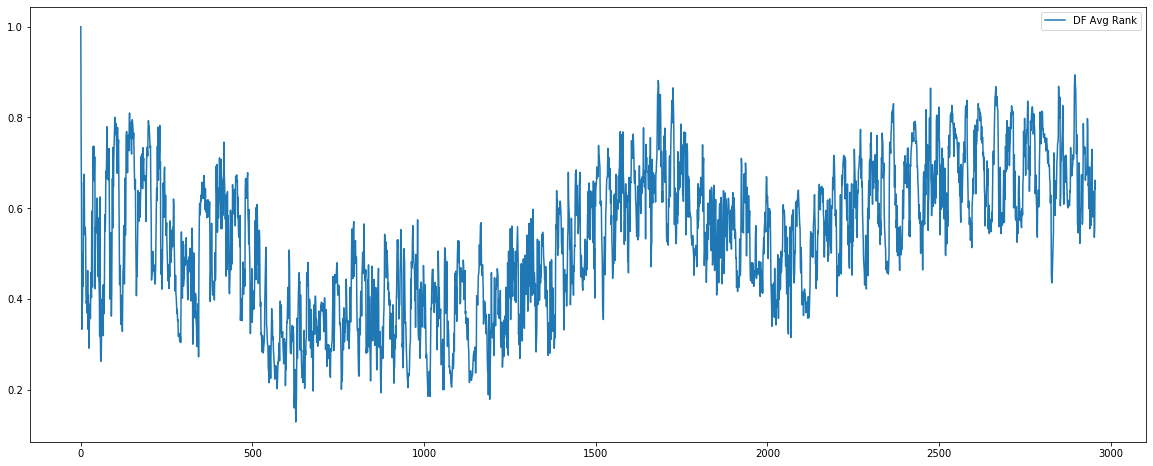

In [202]:
df.plot(figsize=(20,8))

In [203]:
df['06m-SMA']=df['DF Avg Rank'].rolling(window=6).mean()
df['12m-SMA']=df['DF Avg Rank'].rolling(window=12).mean()
df['24m-SMA']=df['DF Avg Rank'].rolling(window=24).mean()

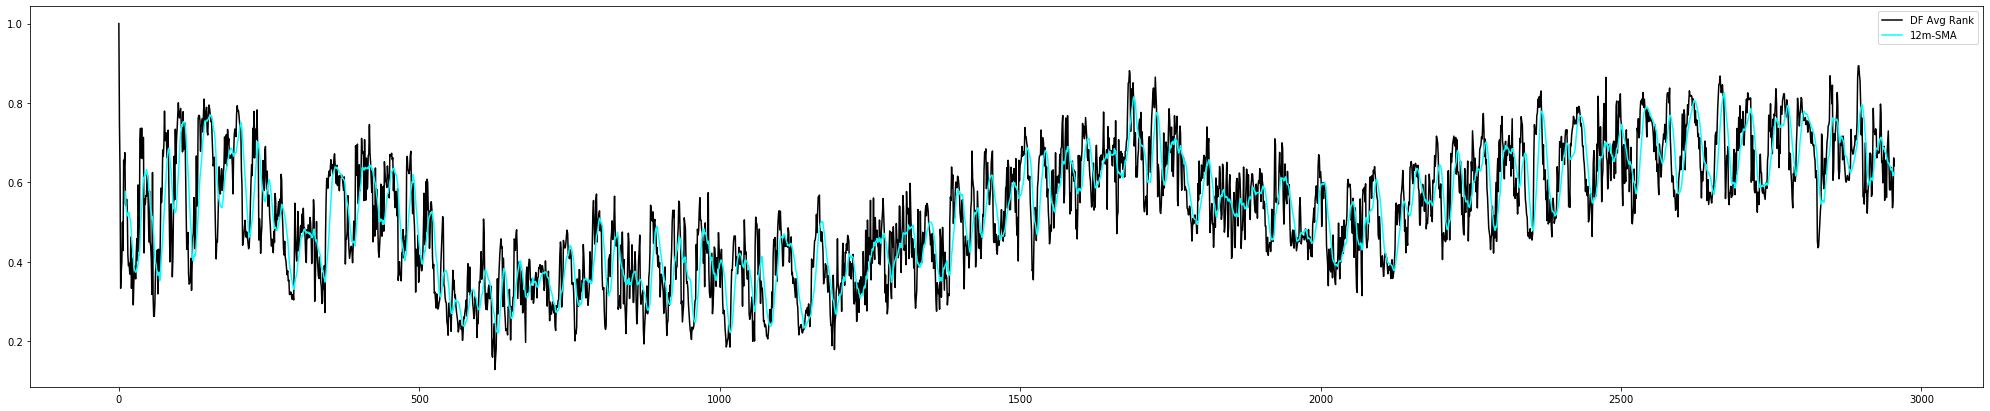

In [204]:
df['DF Avg Rank'].plot(color='black', figsize=(35,7),label='DF Avg Rank')
#df['06m-SMA'].plot(color='green',label='06m-SMA')
df['12m-SMA'].plot(color='cyan',label='12m-SMA')
#df['24m-SMA'].plot(color='blue',label='24m-SMA')
plt.legend()

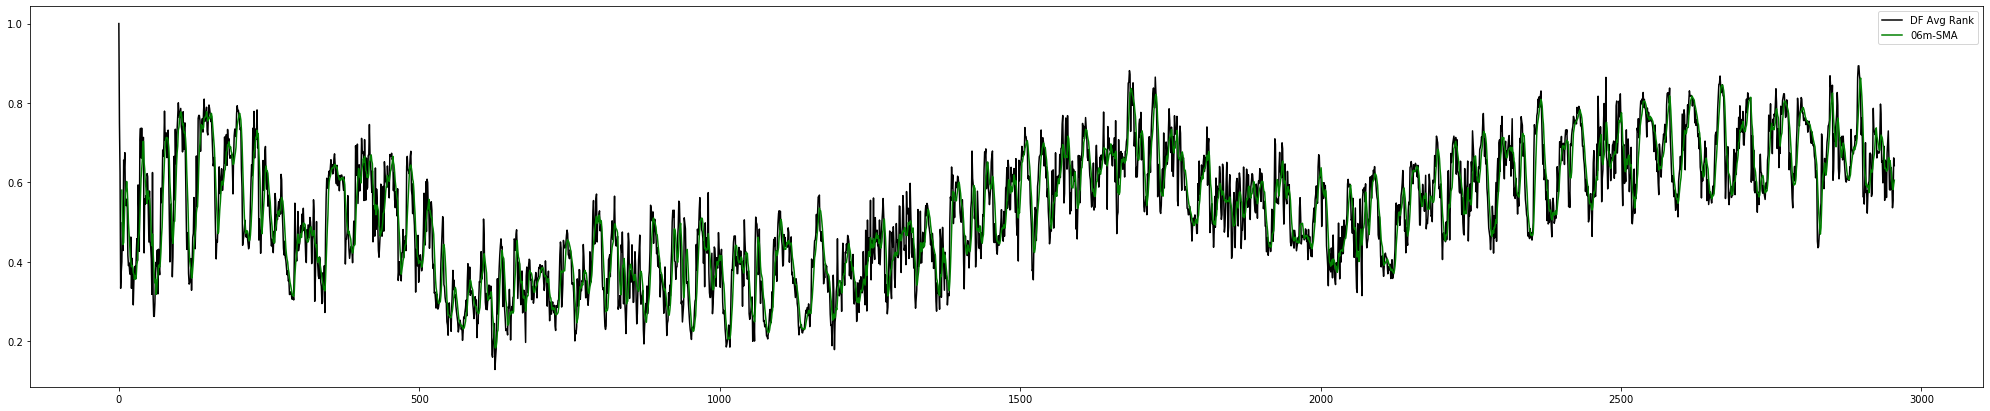

In [205]:
df['DF Avg Rank'].plot(color='black', figsize=(35,7),label='DF Avg Rank')
df['06m-SMA'].plot(color='green',label='06m-SMA')
#df['12m-SMA'].plot(color='cyan',label='12m-SMA')
#df['24m-SMA'].plot(color='blue',label='24m-SMA')
plt.legend()

In [261]:
values

array([1.        , 0.75      , 0.625     , ..., 0.55485946, 0.66181449,
       0.64247039])

In [327]:
df=pd.read_csv('AUD_JPY.csv',usecols=["Date","DF Avg Rank"])#,index_col="Date")
values=df["DF Avg Rank"].values
num_perd=6
previous=20
actual_values=values[-num_perd:]
values=values[0:-num_perd]
current_values=values[-previous:]

In [328]:
def make_forecast(current_data,multi_step,past):
    pred_list=[]
    current_data=current_data.tolist()
    for _ in range(0,multi_step):
        #pred=pd.Series(current_data).rolling(past).mean()[-1:]
        pred=pd.Series(current_data).rolling(past).mean()[-1:]
        pred=float(pred.to_string(index=False))
        pred_list.append(pred)
        current_data.append(pred)
        current_data=current_data[-past:] 
    return pred_list

In [329]:
pred=make_forecast(current_values,num_perd,previous)

In [330]:
pl=pd.DataFrame({"ac":actual_values,"pr":pred})

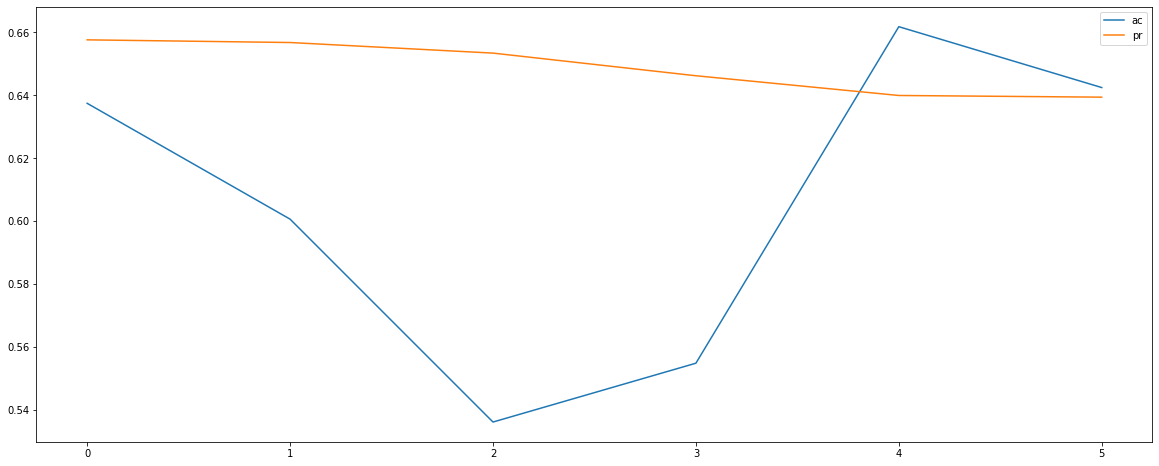

In [332]:
pl.plot(figsize=(20,8))

In [304]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(actual_values,pred)
mse

0.005909928158297159

In [311]:
mse=mean_squared_error(actual_values,pred)
mse

0.0068891583807323105